In [1]:
install.packages('h2o')
#autoencoders for clustering: https://hub.packtpub.com/implementing-autoencoders-using-h2o/



Warning message in install.packages("h2o"):
“installation of package ‘h2o’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
library(h2o)
demo(h2o.glm)

ERROR: Error in library(h2o): there is no package called ‘h2o’


In [23]:
getwd()

[1] "/home/erikapat/Dropbox/PRUEBAS_DATA_SCIENCE/NOTEBOOKS-DEEP LEARNING/DEEP_LERANING"

In [17]:
library("h2o")

#setwd ("c://R")


ERROR: Error in library("h2o"): there is no package called ‘h2o’


In [3]:
h2o.init()


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/Rtmps0Vt5I/h2o_erikapat_started_from_r.out
    /tmp/Rtmps0Vt5I/h2o_erikapat_started_from_r.err


Starting H2O JVM and connecting: . Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         3 seconds 367 milliseconds 
    H2O cluster timezone:       Europe/Madrid 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.20.0.2 
    H2O cluster version age:    1 year, 2 months and 21 days !!! 
    H2O cluster name:           H2O_started_from_R_erikapat_ewz348 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.46 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         XGB

Warning message in h2o.clusterInfo():
“
Your H2O cluster version is too old (1 year, 2 months and 21 days)!
Please download and install the latest version from http://h2o.ai/download/”

In [4]:
#Load the training dataset of movies
movies=read.csv ("ml-latest-small/movies.csv", header=TRUE)
head(movies)



movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller


  |======================================================================| 100%
  |======================================================================| 100%
Model Details:

H2OAutoEncoderModel: deeplearning
Model Key:  DeepLearning_model_R_1567704517353_1 
Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 53,452 weights/biases, 1.1 MB, 98,811 training samples, mini-batch size 1
  layer units  type dropout       l1       l2 mean_rate rate_rms momentum
1     1 10690 Input  0.00 %                                              
2     2     2  Tanh  0.00 % 0.000000 0.000000  0.010942 0.082355 0.000000
3     3 10690  Tanh         0.000000 0.000000  0.166809 0.113898 0.000000
  mean_weight weight_rms mean_bias bias_rms
1                                          
2    0.000077   0.028156 -4.720312 4.631746
3    0.000578   0.042424  0.001248 0.057731

H2OAutoEncoderMetrics: deeplearning
** Reported on training data. **

Training Set Metrics: 

MSE: (Extract with `h

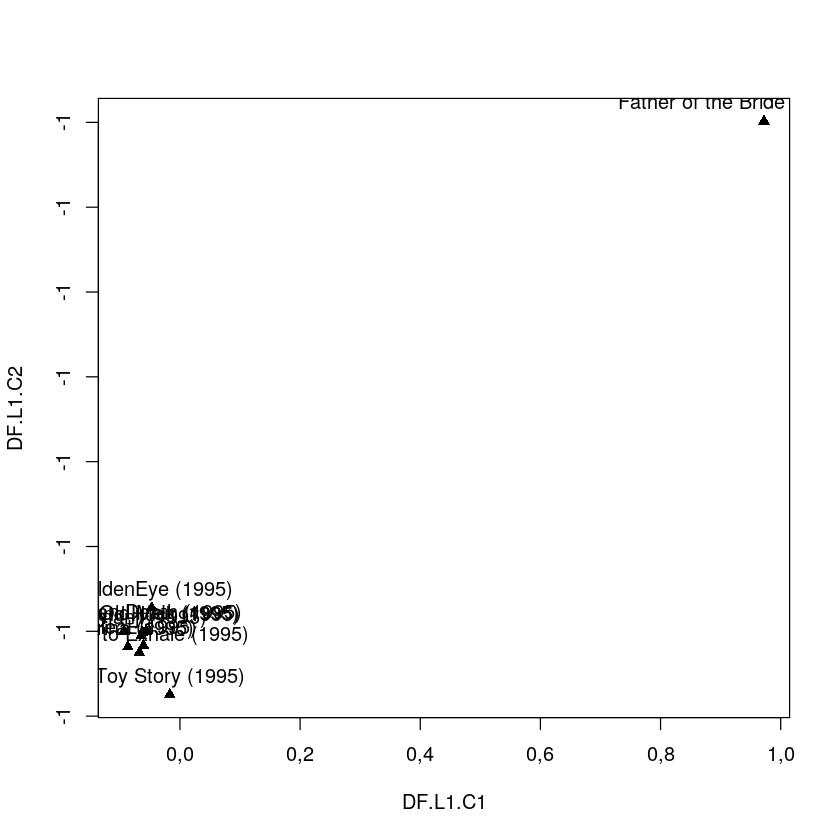

In [5]:
model=h2o.deeplearning(2:3,
                  training_frame=as.h2o(movies),
                  hidden=c(2),
                  autoencoder = T,
                  activation="Tanh")
summary(model)

features=h2o.deepfeatures(model,
                  as.h2o(movies),
                  layer=1)

d=as.matrix(features[1:10,])
labels=as.vector(movies[1:10,2])
plot(d,pch=17)
text(d,labels,pos=3)

## **Anomaly detection**

In [6]:
# point to the prostate data set in the h2o folder - no need to load h2o in memory yet
prosPath = system.file("extdata", "prostate.csv", package = "h2o")
prostate_df <- read.csv(prosPath)

# We don't need the ID field
prostate_df <- prostate_df[,-1]
summary(prostate_df)

    CAPSULE            AGE             RACE           DPROS      
 Min.   :0,0000   Min.   :43,00   Min.   :0,000   Min.   :1,000  
 1st Qu.:0,0000   1st Qu.:62,00   1st Qu.:1,000   1st Qu.:1,000  
 Median :0,0000   Median :67,00   Median :1,000   Median :2,000  
 Mean   :0,4026   Mean   :66,04   Mean   :1,087   Mean   :2,271  
 3rd Qu.:1,0000   3rd Qu.:71,00   3rd Qu.:1,000   3rd Qu.:3,000  
 Max.   :1,0000   Max.   :79,00   Max.   :2,000   Max.   :4,000  
     DCAPS            PSA              VOL           GLEASON     
 Min.   :1,000   Min.   :  0,30   Min.   : 0,00   Min.   :0,000  
 1st Qu.:1,000   1st Qu.:  5,00   1st Qu.: 0,00   1st Qu.:6,000  
 Median :1,000   Median :  8,75   Median :14,25   Median :6,000  
 Mean   :1,108   Mean   : 15,41   Mean   :15,81   Mean   :6,384  
 3rd Qu.:1,000   3rd Qu.: 17,12   3rd Qu.:26,45   3rd Qu.:7,000  
 Max.   :2,000   Max.   :139,70   Max.   :97,60   Max.   :9,000  

Benchmark Random Forest Model

Let’s start by running a simple random forest model on the data by splitting it in two random portions (with a seed) - a training and a testing portion. This will give us a base score to measure our improvements using autoencoding.

In [7]:
set.seed(1234)
random_splits <- runif(nrow(prostate_df))
train_df <- prostate_df[random_splits < .5,]
dim(train_df)
## [1] 193   8
validate_df <- prostate_df[random_splits >=.5,]
dim(validate_df)

[1] 193   8

[1] 187   8

In [8]:
#Install packages randomForest and pROC and run a simple classification model on outcome variable CAPSULE:

#install.packages('randomForest')
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [9]:


outcome_name <- 'CAPSULE'
feature_names <- setdiff(names(prostate_df), outcome_name)
set.seed(1234)
rf_model <- randomForest(x=train_df[,feature_names],
                         y=as.factor(train_df[,outcome_name]),
                         importance=TRUE, ntree=20, mtry = 3)

validate_predictions <- predict(rf_model, newdata=validate_df[,feature_names], type="prob")

In [10]:
#Let’s use the pROC library to calculate our AUC score (remember, an AUC of 0.5 is random and 1 is perfect) and plot a chart:

#install.packages('pROC')
library(pROC)

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following object is masked from ‘package:h2o’:

    var

The following objects are masked from ‘package:stats’:

    cov, smooth, var



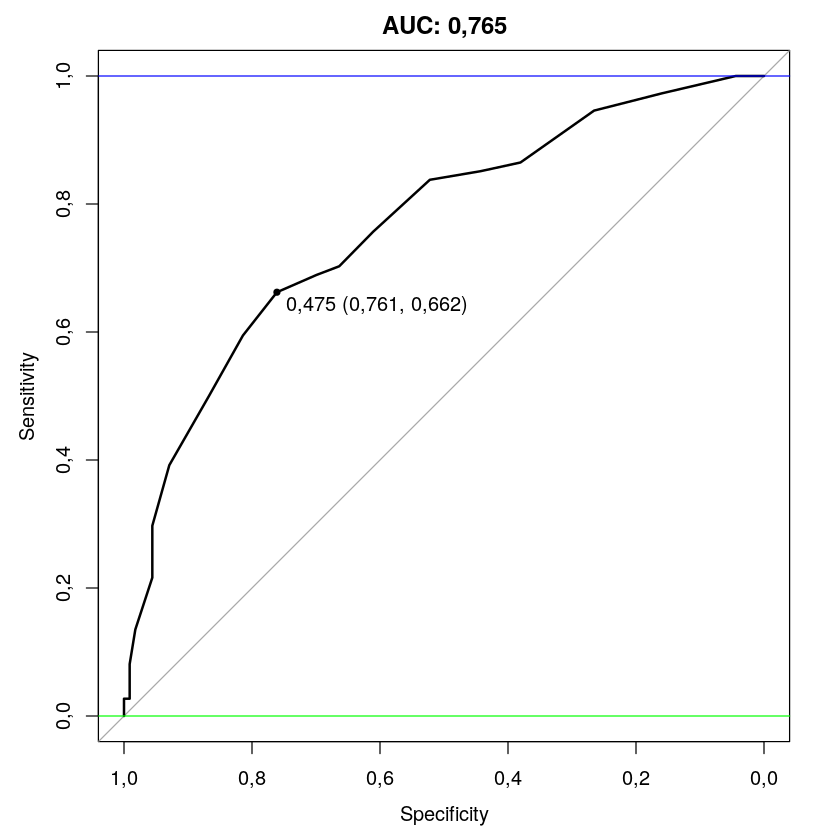

In [11]:
auc_rf = roc(response=as.numeric(as.factor(validate_df[,outcome_name]))-1,
             predictor=validate_predictions[,2])

plot(auc_rf, print.thres = "best", main=paste('AUC:',round(auc_rf$auc[[1]],3)))
abline(h=1,col='blue')
abline(h=0,col='green')

In [12]:
#Autoencoder
#Let’s see how an unsupervised autoencoding can assist us here. Start by initializing an h2o instance and create an H2O frame from the prostate data set:

library(h2o)
localH2O = h2o.init()


 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 minutes 6 seconds 
    H2O cluster timezone:       Europe/Madrid 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.20.0.2 
    H2O cluster version age:    1 year, 2 months and 21 days !!! 
    H2O cluster name:           H2O_started_from_R_erikapat_ewz348 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3,42 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4 
    R Version:                  R version 3.5.1 (2018-07-02) 


Warning message in h2o.clusterInfo():
“
Your H2O cluster version is too old (1 year, 2 months and 21 days)!
Please download and install the latest version from http://h2o.ai/download/”

In [13]:
prostate.hex<-as.h2o(train_df, destination_frame="train.hex")

ERROR: Error in h2o.parseSetup(data, pattern = "", destination_frame, header, : length of col.names must equal to the number of columns in dataset


In [ ]:
#Getting down to the heart of our business, let’s call the deeplearning function with parameter autoencoder set to TRUE 
#(we also set the reproducible flag to TRUE along with a seed so we all see the same results but this is substantially slower than setting the flag to FALSE):

prostate.dl = h2o.deeplearning(x = feature_names, training_frame = prostate.hex,
                               autoencoder = TRUE,
                               reproducible = T,
                               seed = 1234,
                               hidden = c(6,5,6), epochs = 50)